In [3]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from IPython.display import display
from PIL import Image, ImageDraw
from shared.drawing import *

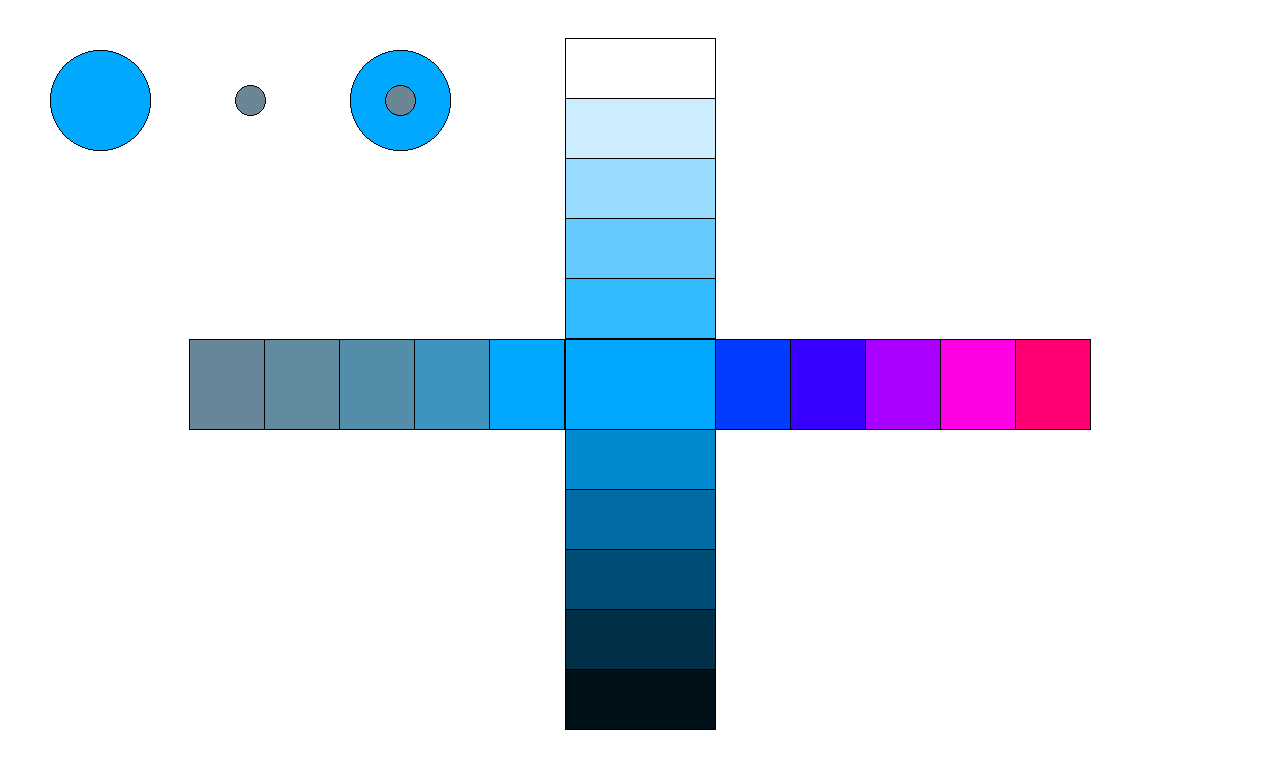

In [4]:
IMG_SIZE = Size(1280, 768)
IMG_CENTER = Point(IMG_SIZE.width / 2, IMG_SIZE.height / 2)
NUM_BOXES = 6

image = Image.new("RGB", (IMG_SIZE.width, IMG_SIZE.height), color="white")
canvas = ImageDraw.Draw(image)
root = Rectangle(
    Size(150, 90), 
    Color(200, 100, 50), 
    Stroke(Color(0, 0, 0), 1),
    Point(IMG_CENTER.x, IMG_CENTER.y))


def draw_tints():
    for i in range(1, NUM_BOXES):
        new_lum = root.fill.lum + (i * 10)
        new_color = Color(root.fill.hue, root.fill.sat, new_lum)

        new_size = Size(root.size.width, root.size.height * 0.667)
        y_offset = (root.size.height // 2) - (new_size.height // 2) + (new_size.height * i)
        new_center = Point(IMG_CENTER.x, IMG_CENTER.y - y_offset)
        rect = Rectangle(new_size, new_color, root.stroke, new_center)
        
        rect.draw(canvas)


def draw_shades():
    for i in range(1, NUM_BOXES):
        new_lum = root.fill.lum - (i * 9)
        new_color = Color(root.fill.hue, root.fill.sat, new_lum)
        
        new_size = Size(root.size.width, root.size.height * 0.667)
        y_offset = (root.size.height // 2) - (new_size.height // 2) + (new_size.height * i)
        new_center = Point(IMG_CENTER.x, IMG_CENTER.y + y_offset)
        rect = Rectangle(new_size, new_color, root.stroke, new_center)
        
        rect.draw(canvas)


def draw_neutrals():
    for i in range(1, NUM_BOXES):
        comp_color = Color(root.fill.hue + 160, root.fill.sat, root.fill.lum)
        new_color = root.fill.mix(comp_color, ((NUM_BOXES - i) / NUM_BOXES))
        
        new_size = Size(root.size.width * 0.5, root.size.height)
        x_offset = (root.size.width // 2) - (new_size.width // 2) + (new_size.width * i)
        new_center = Point(IMG_CENTER.x + x_offset, IMG_CENTER.y)
        rect = Rectangle(new_size, new_color, root.stroke, new_center)
        
        rect.draw(canvas)


def draw_tones():
    for i in range(1, NUM_BOXES):
        new_color = Color(root.fill.hue, root.fill.sat / i, root.fill.lum)

        new_size = Size(root.size.width * 0.5, root.size.height)
        x_offset = (root.size.width // 2) - (new_size.width // 2) + (new_size.width * i)
        new_center = Point(IMG_CENTER.x - x_offset, IMG_CENTER.y)
        rect = Rectangle(new_size, new_color, root.stroke, new_center)
        
        rect.draw(canvas)


def draw_test_tones():
    test_tone_hue = Ellipse(
        Size(100, 100),
        root.fill,
        root.stroke,
        Point(100, 100))

    test_tone_grey = Ellipse(
        Size(30, 30),
        Color(root.fill.hue, root.fill.sat / NUM_BOXES, root.fill.lum),
        root.stroke,
        Point(250, 100))
    
    test_tone_hue.draw(canvas)
    test_tone_grey.draw(canvas)

    overlap_center = Point(400, 100)
    test_tone_hue.center = overlap_center
    test_tone_grey.center = overlap_center

    test_tone_hue.draw(canvas)
    test_tone_grey.draw(canvas)


root.draw(canvas)
draw_tints()
draw_shades()
draw_neutrals()
draw_tones()
draw_test_tones()

display(image)